In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

In [63]:
X_train = np.linspace(-1, 1, 20)

In [64]:
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])

In [65]:
X_test = np.linspace(-1, 1, 20)

In [66]:
y_test = np.array([-0.69415, -0.451  , -0.43005, -0.4484 , -0.1475 ,
                   -0.5019 , -0.28055,  0.24595, -0.21425, -0.0286 ,
                   0.23415,  0.46575, 0.07955,  0.1973 ,  0.0719 ,
                   0.3639 ,  0.5536 ,  0.3365 , 0.50705,  0.33435])

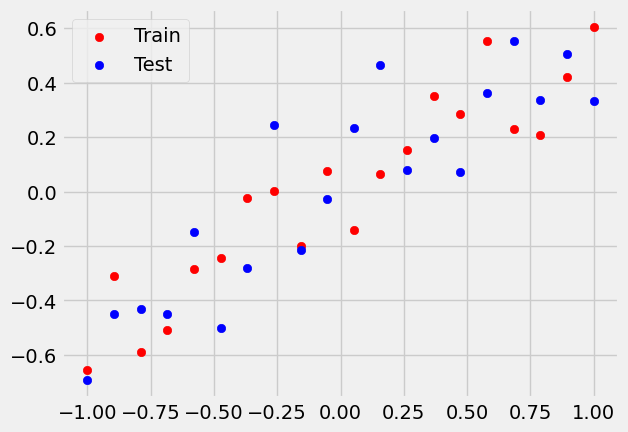

In [67]:
plt.scatter(X_train, y_train, c='red', label = 'Train')
plt.scatter(X_test, y_test, c='blue', label = 'Test')
plt.legend()
plt.show()

In [68]:
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.float)
X_test = torch.from_numpy(X_test).type(torch.float)
y_test = torch.from_numpy(y_test).type(torch.float)

In [69]:
X_train = X_train.unsqueeze(dim=1)
X_test = X_test.unsqueeze(dim=1)

In [70]:
type(X_train)

torch.Tensor

In [71]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [72]:
y_train.shape

torch.Size([20])

# Model

In [73]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=1, out_features=20),
        nn.ReLU(),
        nn.Linear(in_features=20, out_features=1)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

model = Model().to(device)
model

Model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=1, bias=True)
  )
)

In [74]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [75]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  # forward
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

# backward
  loss.backward()

  # optimizer step
  optimizer.step()

# Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = criterion(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.18859601020812988 | Test Loss: 0.175638347864151
Epoch: 10 | Loss: 0.1338011473417282 | Test Loss: 0.14215604960918427
Epoch: 20 | Loss: 0.1291135549545288 | Test Loss: 0.14194178581237793
Epoch: 30 | Loss: 0.12728263437747955 | Test Loss: 0.13929666578769684
Epoch: 40 | Loss: 0.1263737976551056 | Test Loss: 0.13952380418777466
Epoch: 50 | Loss: 0.12612509727478027 | Test Loss: 0.13865654170513153
Epoch: 60 | Loss: 0.12602491676807404 | Test Loss: 0.1389489769935608
Epoch: 70 | Loss: 0.12597593665122986 | Test Loss: 0.13867712020874023
Epoch: 80 | Loss: 0.1259557455778122 | Test Loss: 0.13877040147781372
Epoch: 90 | Loss: 0.12594638764858246 | Test Loss: 0.13872474431991577


In [80]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=1, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=128, out_features=128),
        nn.ReLU(),
        nn.Dropout(p=0.2),
        nn.Linear(in_features=128, out_features=1)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

model = Model().to(device)
model

Model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)

In [81]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

In [78]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 500

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  # forward
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train)

  # optimizer zero grad
  optimizer.zero_grad()

# backward
  loss.backward()

  # optimizer step
  optimizer.step()

# Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = criterion(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.1344798505306244 | Test Loss: 0.145652636885643
Epoch: 10 | Loss: 0.13502468168735504 | Test Loss: 0.14051887392997742
Epoch: 20 | Loss: 0.12869739532470703 | Test Loss: 0.13951978087425232
Epoch: 30 | Loss: 0.12937532365322113 | Test Loss: 0.13892453908920288
Epoch: 40 | Loss: 0.12820319831371307 | Test Loss: 0.13873320817947388
Epoch: 50 | Loss: 0.1292906403541565 | Test Loss: 0.13867995142936707
Epoch: 60 | Loss: 0.12717674672603607 | Test Loss: 0.13871294260025024
Epoch: 70 | Loss: 0.1278034746646881 | Test Loss: 0.1386706680059433
Epoch: 80 | Loss: 0.12684854865074158 | Test Loss: 0.13865070044994354
Epoch: 90 | Loss: 0.12716113030910492 | Test Loss: 0.1386464238166809
Epoch: 100 | Loss: 0.12657581269741058 | Test Loss: 0.13865327835083008
Epoch: 110 | Loss: 0.12675632536411285 | Test Loss: 0.13865338265895844
Epoch: 120 | Loss: 0.12656821310520172 | Test Loss: 0.13866646587848663
Epoch: 130 | Loss: 0.12764111161231995 | Test Loss: 0.13865885138511658
Epoch: 140

In [82]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 500

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


for epoch in range(epochs):
  for X_batch, y_batch in train_loader:
    model.train()

  # forward
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

  # optimizer zero grad
    optimizer.zero_grad()

# backward
    loss.backward()

  # optimizer step
    optimizer.step()

# Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = criterion(test_pred, y_test)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.13738678395748138 | Test Loss: 0.13941407203674316
Epoch: 10 | Loss: 0.13102073967456818 | Test Loss: 0.14011354744434357
Epoch: 20 | Loss: 0.12900134921073914 | Test Loss: 0.1389959752559662
Epoch: 30 | Loss: 0.12845966219902039 | Test Loss: 0.1389089971780777
Epoch: 40 | Loss: 0.12685851752758026 | Test Loss: 0.13869410753250122
Epoch: 50 | Loss: 0.1268494725227356 | Test Loss: 0.1386459618806839
Epoch: 60 | Loss: 0.12659290432929993 | Test Loss: 0.13864366710186005
Epoch: 70 | Loss: 0.12645462155342102 | Test Loss: 0.13864769041538239
Epoch: 80 | Loss: 0.12652643024921417 | Test Loss: 0.138673797249794
Epoch: 90 | Loss: 0.12638550996780396 | Test Loss: 0.13866658508777618
Epoch: 100 | Loss: 0.12636159360408783 | Test Loss: 0.1386236697435379
Epoch: 110 | Loss: 0.1262817084789276 | Test Loss: 0.13861507177352905
Epoch: 120 | Loss: 0.1261623501777649 | Test Loss: 0.1386159360408783
Epoch: 130 | Loss: 0.12619639933109283 | Test Loss: 0.13861897587776184
Epoch: 140 | 